In [39]:
# Import all necessary libraries.
import numpy as np
import pandas as pd
from sklearn  import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [40]:
# Set seeds for reproduciability
np.random.seed(0)

# Read dataset

In [41]:
# Import Dataset

traffic_data = pd.read_csv("dataset/Metro_Interstate_Traffic_Volume.csv", parse_dates=['date_time'], index_col='date_time')

In [42]:
traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [43]:
# Checking for any missing or empty value
traffic_data.isna().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
dtype: int64

# convert categorical to nominal data

In [44]:
# Convert categorical value to numerical values. For holiday attribute, value will be within by 0 and 1. If it is holiday then 1 otherwise 0
label_encoder = preprocessing.LabelEncoder()
traffic_data['holiday'] = np.where(traffic_data.holiday=='None',0,1).astype('int64')
traffic_data['weather_main'] = label_encoder.fit_transform(traffic_data['weather_main'])
traffic_data['weather_description'] = label_encoder.fit_transform(traffic_data['weather_description'])

In [45]:
traffic_data.describe()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,0.001265,281.205870,0.334264,0.000222,49.362231,2.578375,16.540536,3259.818355
std,0.035551,13.338232,44.789133,0.008168,39.015750,2.784224,8.970108,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,272.160000,0.000000,0.000000,1.000000,0.000000,10.000000,1193.000000
50%,0.000000,282.450000,0.000000,0.000000,64.000000,1.000000,17.000000,3380.000000
75%,0.000000,291.806000,0.000000,0.000000,90.000000,5.000000,27.000000,4933.000000
max,1.000000,310.070000,9831.300000,0.510000,100.000000,10.000000,37.000000,7280.000000


<AxesSubplot:xlabel='date_time'>

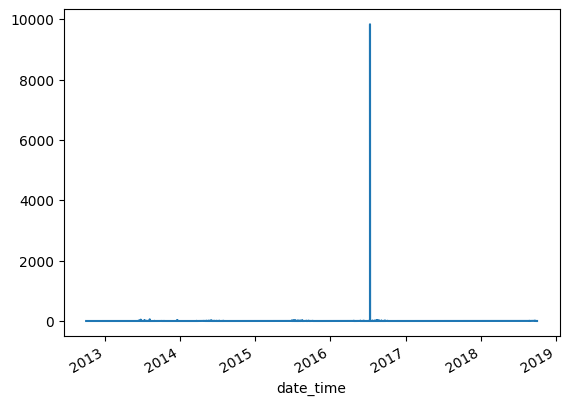

In [46]:
#traffic_data['temp'].plot()
traffic_data['rain_1h'].plot()

<AxesSubplot:xlabel='date_time'>

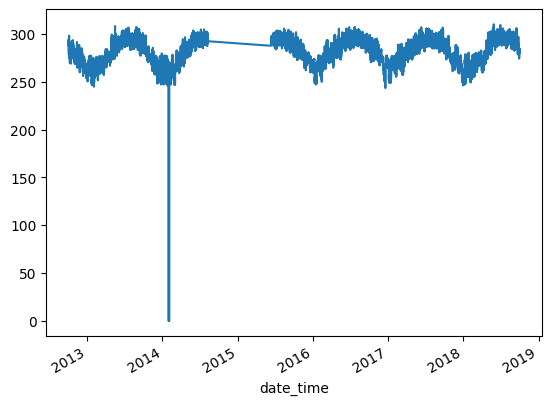

In [47]:
traffic_data['temp'].plot()

In [48]:
Q1 = traffic_data.quantile(0.25)
Q3 = traffic_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

holiday                   0.000
temp                     19.646
rain_1h                   0.000
snow_1h                   0.000
clouds_all               89.000
weather_main              5.000
weather_description      17.000
traffic_volume         3740.000
dtype: float64


In [49]:
traffic_data=traffic_data[~((traffic_data['temp'] <(Q1['temp']-1.5*IQR['temp'])) | (traffic_data['temp'] >(Q1['temp']+1.5*IQR['temp'])))]
#traffic_data=traffic_data[~((traffic_data['rain_1h'] <(Q1['rain_1h']-1.5*IQR['rain_1h'])) | (traffic_data['rain_1h'] >(Q1['rain_1h']+1.5*IQR['rain_1h'])))]

# Prepare training and testing data

<AxesSubplot:xlabel='date_time'>

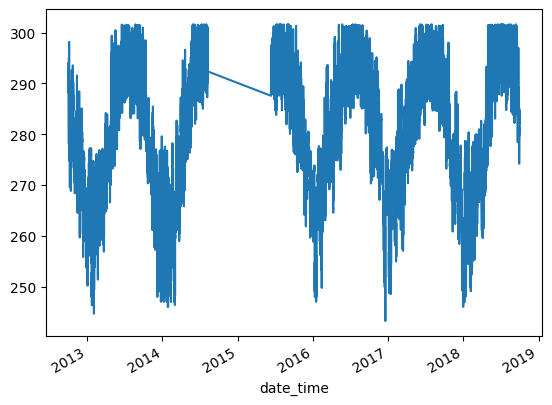

In [50]:
# ploting traffic data to see to see any data imbalance
traffic_data['temp'].plot()

<AxesSubplot:xlabel='date_time'>

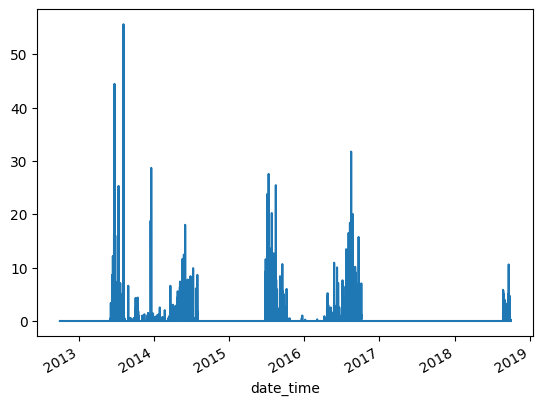

In [51]:
traffic_data['rain_1h'].plot()

In [52]:

traffic_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,0,288.28,0.0,0.0,40,1,24,5545
2012-10-02 10:00:00,0,289.36,0.0,0.0,75,1,2,4516
2012-10-02 11:00:00,0,289.58,0.0,0.0,90,1,19,4767
2012-10-02 12:00:00,0,290.13,0.0,0.0,90,1,19,5026
2012-10-02 13:00:00,0,291.14,0.0,0.0,75,1,2,4918
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,0,283.45,0.0,0.0,75,1,2,3543
2018-09-30 20:00:00,0,282.76,0.0,0.0,90,1,19,2781
2018-09-30 21:00:00,0,282.73,0.0,0.0,90,10,21,2159


In [53]:
# Values of the attribute are in different scales. For example, holiday has maximum value 1 and traffic volume let say, 2000. Since these values are totally different range, it might be hurt model learning process. To overcome this issue, we need to do data normalization or standarization.
sc = MinMaxScaler()
data_set = sc.fit_transform(traffic_data)
data_frame = pd.DataFrame(data_set)


In [54]:
# Make data for the LSTM model. I used past t-hours of data to predict the next 'n' hours data. Here window_size means window size data will be used for predicting next 'n' hours data

def df_to_x_y(data, window_size=5):
    X = []
    y = []
    for i in range(len(data)-window_size):
        row = [r for r in data[i:i+window_size]]
        X.append(row)
        label = data[i+window_size][7]
        y.append(label)
    return np.array(X), np.array(y)

X, y = df_to_x_y(data_set,24)
X.shape, y.shape

((47260, 24, 8), (47260,))

In [55]:
# split data into train test and validation datase
from cgi import test


train_length = int(len(X)*0.8) # 80% trainging
test_length = int(len(X)*.10) # 10% testing and rest for validation
print(train_length, test_length, (train_length+test_length))
X_train, y_train = X[:train_length],y[:train_length]
X_val, y_val = X[train_length:(train_length+test_length)], y[train_length:(train_length+test_length)]
X_test, y_test = X[(train_length+test_length):], y[(train_length+test_length):]

37808 4726 42534


In [56]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape), (X_val.shape, y_val.shape)


(((37808, 24, 8), (37808,)),
 ((4726, 24, 8), (4726,)),
 ((4726, 24, 8), (4726,)))

In [70]:
#define model:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
tf.random.set_seed(0)
model = Sequential()
model.add(InputLayer((24,8)))
model.add(GRU(128, return_sequences=True))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(GRU(16))
model.add(Dense(1,'linear'))


In [71]:
cp = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001))


In [82]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, callbacks=[cp], batch_size=128, verbose=1)

Epoch 1/500
296/296 [==============================] - ETA: 0s - loss: 0.0079

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 17s 58ms/step - loss: 0.0079 - val_loss: 0.0049
Epoch 2/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0079 - val_loss: 0.0050
Epoch 3/500
295/296 [============================>.] - ETA: 0s - loss: 0.0078

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 53ms/step - loss: 0.0078 - val_loss: 0.0048
Epoch 4/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0077 - val_loss: 0.0048
Epoch 5/500
296/296 [==============================] - ETA: 0s - loss: 0.0077

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 54ms/step - loss: 0.0077 - val_loss: 0.0047
Epoch 6/500
294/296 [============================>.] - ETA: 0s - loss: 0.0076

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 54ms/step - loss: 0.0076 - val_loss: 0.0045
Epoch 7/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0074 - val_loss: 0.0045
Epoch 8/500
296/296 [==============================] - ETA: 0s - loss: 0.0073

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 15s 52ms/step - loss: 0.0073 - val_loss: 0.0044
Epoch 9/500
296/296 [==============================] - 7s 22ms/step - loss: 0.0072 - val_loss: 0.0045
Epoch 10/500
295/296 [============================>.] - ETA: 0s - loss: 0.0070

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 17s 56ms/step - loss: 0.0070 - val_loss: 0.0043
Epoch 11/500
294/296 [============================>.] - ETA: 0s - loss: 0.0070

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 54ms/step - loss: 0.0070 - val_loss: 0.0043
Epoch 12/500
296/296 [==============================] - 6s 22ms/step - loss: 0.0069 - val_loss: 0.0043
Epoch 13/500
296/296 [==============================] - ETA: 0s - loss: 0.0068

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 53ms/step - loss: 0.0068 - val_loss: 0.0039
Epoch 14/500
296/296 [==============================] - ETA: 0s - loss: 0.0067

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 56ms/step - loss: 0.0067 - val_loss: 0.0038
Epoch 15/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0066 - val_loss: 0.0039
Epoch 16/500
295/296 [============================>.] - ETA: 0s - loss: 0.0065

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 15s 51ms/step - loss: 0.0065 - val_loss: 0.0036
Epoch 17/500
296/296 [==============================] - 7s 22ms/step - loss: 0.0065 - val_loss: 0.0037
Epoch 18/500
294/296 [============================>.] - ETA: 0s - loss: 0.0064

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 56ms/step - loss: 0.0064 - val_loss: 0.0036
Epoch 19/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0064 - val_loss: 0.0039
Epoch 20/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0063 - val_loss: 0.0038
Epoch 21/500
296/296 [==============================] - ETA: 0s - loss: 0.0062

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 55ms/step - loss: 0.0062 - val_loss: 0.0035
Epoch 22/500
296/296 [==============================] - 6s 22ms/step - loss: 0.0062 - val_loss: 0.0035
Epoch 23/500
296/296 [==============================] - ETA: 0s - loss: 0.0062

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 15s 52ms/step - loss: 0.0062 - val_loss: 0.0034
Epoch 24/500
296/296 [==============================] - 5s 18ms/step - loss: 0.0061 - val_loss: 0.0038
Epoch 25/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0061 - val_loss: 0.0035
Epoch 26/500
296/296 [==============================] - 6s 22ms/step - loss: 0.0060 - val_loss: 0.0035
Epoch 27/500
296/296 [==============================] - ETA: 0s - loss: 0.0060

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 55ms/step - loss: 0.0060 - val_loss: 0.0034
Epoch 28/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0060 - val_loss: 0.0034
Epoch 29/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0059 - val_loss: 0.0036
Epoch 30/500
296/296 [==============================] - 6s 22ms/step - loss: 0.0059 - val_loss: 0.0035
Epoch 31/500
296/296 [==============================] - 6s 22ms/step - loss: 0.0059 - val_loss: 0.0037
Epoch 32/500
296/296 [==============================] - 6s 22ms/step - loss: 0.0058 - val_loss: 0.0035
Epoch 33/500
296/296 [==============================] - ETA: 0s - loss: 0.0058

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 53ms/step - loss: 0.0058 - val_loss: 0.0032
Epoch 34/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0058 - val_loss: 0.0034
Epoch 35/500
296/296 [==============================] - 6s 22ms/step - loss: 0.0058 - val_loss: 0.0033
Epoch 36/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0058 - val_loss: 0.0032
Epoch 37/500
296/296 [==============================] - 6s 22ms/step - loss: 0.0057 - val_loss: 0.0033
Epoch 38/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0057 - val_loss: 0.0032
Epoch 39/500
295/296 [============================>.] - ETA: 0s - loss: 0.0057

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 17s 56ms/step - loss: 0.0057 - val_loss: 0.0032
Epoch 40/500
296/296 [==============================] - ETA: 0s - loss: 0.0057

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 15s 52ms/step - loss: 0.0057 - val_loss: 0.0032
Epoch 41/500
296/296 [==============================] - 7s 22ms/step - loss: 0.0056 - val_loss: 0.0032
Epoch 42/500
293/296 [============================>.] - ETA: 0s - loss: 0.0056

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 56ms/step - loss: 0.0056 - val_loss: 0.0031
Epoch 43/500
296/296 [==============================] - 7s 22ms/step - loss: 0.0056 - val_loss: 0.0034
Epoch 44/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0056 - val_loss: 0.0032
Epoch 45/500
296/296 [==============================] - 6s 22ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 46/500
296/296 [==============================] - 6s 22ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 47/500
296/296 [==============================] - 6s 22ms/step - loss: 0.0056 - val_loss: 0.0034
Epoch 48/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0055 - val_loss: 0.0031
Epoch 49/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 50/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0055 - val_loss: 0.0033
Epoch 51/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0055 -

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 15s 52ms/step - loss: 0.0055 - val_loss: 0.0030
Epoch 53/500
295/296 [============================>.] - ETA: 0s - loss: 0.0054

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 15s 52ms/step - loss: 0.0054 - val_loss: 0.0030
Epoch 54/500
296/296 [==============================] - ETA: 0s - loss: 0.0054

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 55ms/step - loss: 0.0054 - val_loss: 0.0030
Epoch 55/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0054 - val_loss: 0.0031
Epoch 56/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0054 - val_loss: 0.0032
Epoch 57/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0054 - val_loss: 0.0031
Epoch 58/500
296/296 [==============================] - ETA: 0s - loss: 0.0054

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 53ms/step - loss: 0.0054 - val_loss: 0.0030
Epoch 59/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0053 - val_loss: 0.0030
Epoch 60/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0053 - val_loss: 0.0030
Epoch 61/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0053 - val_loss: 0.0030
Epoch 62/500
296/296 [==============================] - ETA: 0s - loss: 0.0053

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 53ms/step - loss: 0.0053 - val_loss: 0.0029
Epoch 63/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0053 - val_loss: 0.0029
Epoch 64/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0053 - val_loss: 0.0029
Epoch 65/500
296/296 [==============================] - ETA: 0s - loss: 0.0053

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 54ms/step - loss: 0.0053 - val_loss: 0.0029
Epoch 66/500
295/296 [============================>.] - ETA: 0s - loss: 0.0052

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 54ms/step - loss: 0.0052 - val_loss: 0.0029
Epoch 67/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0053 - val_loss: 0.0029
Epoch 68/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0052 - val_loss: 0.0030
Epoch 69/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0052 - val_loss: 0.0029
Epoch 70/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0052 - val_loss: 0.0029
Epoch 71/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0052 - val_loss: 0.0033
Epoch 72/500
296/296 [==============================] - 6s 22ms/step - loss: 0.0052 - val_loss: 0.0029
Epoch 73/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0052 - val_loss: 0.0030
Epoch 74/500
294/296 [============================>.] - ETA: 0s - loss: 0.0052

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 15s 50ms/step - loss: 0.0052 - val_loss: 0.0028
Epoch 75/500
295/296 [============================>.] - ETA: 0s - loss: 0.0052

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 55ms/step - loss: 0.0052 - val_loss: 0.0028
Epoch 76/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0051 - val_loss: 0.0028
Epoch 77/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0051 - val_loss: 0.0029
Epoch 78/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0051 - val_loss: 0.0028
Epoch 79/500
296/296 [==============================] - ETA: 0s - loss: 0.0051

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 15s 51ms/step - loss: 0.0051 - val_loss: 0.0028
Epoch 80/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0051 - val_loss: 0.0029
Epoch 81/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0051 - val_loss: 0.0028
Epoch 82/500
296/296 [==============================] - ETA: 0s - loss: 0.0051

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 54ms/step - loss: 0.0051 - val_loss: 0.0028
Epoch 83/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0051 - val_loss: 0.0029
Epoch 84/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0051 - val_loss: 0.0030
Epoch 85/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0050 - val_loss: 0.0028
Epoch 86/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0051 - val_loss: 0.0028
Epoch 87/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0050 - val_loss: 0.0028
Epoch 88/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0050 - val_loss: 0.0028
Epoch 89/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0050 - val_loss: 0.0030
Epoch 90/500
293/296 [============================>.] - ETA: 0s - loss: 0.0050

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 15s 51ms/step - loss: 0.0050 - val_loss: 0.0028
Epoch 91/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 92/500
296/296 [==============================] - 7s 24ms/step - loss: 0.0050 - val_loss: 0.0028
Epoch 93/500
293/296 [============================>.] - ETA: 0s - loss: 0.0050

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 15s 52ms/step - loss: 0.0050 - val_loss: 0.0027
Epoch 94/500
296/296 [==============================] - 6s 19ms/step - loss: 0.0050 - val_loss: 0.0028
Epoch 95/500
296/296 [==============================] - 5s 19ms/step - loss: 0.0049 - val_loss: 0.0027
Epoch 96/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0049 - val_loss: 0.0029
Epoch 97/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0049 - val_loss: 0.0028
Epoch 98/500
295/296 [============================>.] - ETA: 0s - loss: 0.0049

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 53ms/step - loss: 0.0049 - val_loss: 0.0027
Epoch 99/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0049 - val_loss: 0.0028
Epoch 100/500
294/296 [============================>.] - ETA: 0s - loss: 0.0049

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 15s 51ms/step - loss: 0.0049 - val_loss: 0.0027
Epoch 101/500
296/296 [==============================] - ETA: 0s - loss: 0.0049

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 55ms/step - loss: 0.0049 - val_loss: 0.0026
Epoch 102/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0049 - val_loss: 0.0028
Epoch 103/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0049 - val_loss: 0.0028
Epoch 104/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0048 - val_loss: 0.0028
Epoch 105/500
296/296 [==============================] - 7s 22ms/step - loss: 0.0048 - val_loss: 0.0027
Epoch 106/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0048 - val_loss: 0.0028
Epoch 107/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0048 - val_loss: 0.0026
Epoch 108/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0048 - val_loss: 0.0027
Epoch 109/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0048 - val_loss: 0.0027
Epoch 110/500
296/296 [==============================] - 7s 22ms/step - loss:

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 53ms/step - loss: 0.0048 - val_loss: 0.0026
Epoch 115/500
296/296 [==============================] - 7s 22ms/step - loss: 0.0047 - val_loss: 0.0026
Epoch 116/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0047 - val_loss: 0.0026
Epoch 117/500
296/296 [==============================] - 6s 22ms/step - loss: 0.0048 - val_loss: 0.0027
Epoch 118/500
296/296 [==============================] - 7s 22ms/step - loss: 0.0047 - val_loss: 0.0026
Epoch 119/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0047 - val_loss: 0.0029
Epoch 120/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0047 - val_loss: 0.0026
Epoch 121/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0047 - val_loss: 0.0028
Epoch 122/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0047 - val_loss: 0.0027
Epoch 123/500
296/296 [==============================] - 6s 20ms/step - loss:

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 15s 49ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 130/500
296/296 [==============================] - 6s 22ms/step - loss: 0.0046 - val_loss: 0.0027
Epoch 131/500
295/296 [============================>.] - ETA: 0s - loss: 0.0046

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 54ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 132/500
296/296 [==============================] - 7s 22ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 133/500
294/296 [============================>.] - ETA: 0s - loss: 0.0046

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


296/296 [==============================] - 16s 54ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 134/500
296/296 [==============================] - 7s 22ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 135/500
296/296 [==============================] - 7s 22ms/step - loss: 0.0046 - val_loss: 0.0027
Epoch 136/500
296/296 [==============================] - 6s 22ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 137/500
296/296 [==============================] - 7s 22ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 138/500
296/296 [==============================] - 6s 22ms/step - loss: 0.0046 - val_loss: 0.0027
Epoch 139/500
296/296 [==============================] - 7s 22ms/step - loss: 0.0046 - val_loss: 0.0028
Epoch 140/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0046 - val_loss: 0.0027
Epoch 141/500
296/296 [==============================] - 7s 22ms/step - loss: 0.0045 - val_loss: 0.0026
Epoch 142/500
296/296 [==============================] - 6s 22ms/step - loss:

Epoch 212/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 213/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 214/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0041 - val_loss: 0.0026
Epoch 215/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0040 - val_loss: 0.0026
Epoch 216/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 217/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 218/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 219/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 220/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 221/500
296/296 [==============================] - 6s 21ms

Epoch 291/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 292/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 293/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 294/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 295/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 296/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 297/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 298/500
296/296 [==============================] - 6s 19ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 299/500
296/296 [==============================] - 6s 19ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 300/500
296/296 [==============================] - 5s 18ms

Epoch 370/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 371/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 372/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 373/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 374/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 375/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 376/500
296/296 [==============================] - 6s 22ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 377/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 378/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 379/500
296/296 [==============================] - 6s 21ms

Epoch 449/500
296/296 [==============================] - 6s 20ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 450/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0025 - val_loss: 0.0032
Epoch 451/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0025 - val_loss: 0.0034
Epoch 452/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 453/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 454/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 455/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 456/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 457/500
296/296 [==============================] - 6s 21ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 458/500
296/296 [==============================] - 6s 21ms

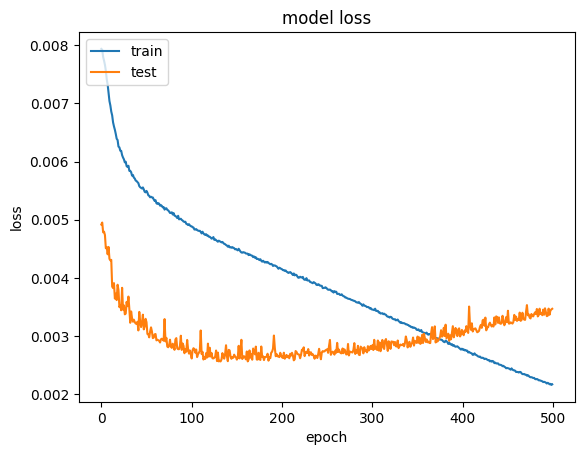

In [83]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [84]:
from tensorflow.keras.models import load_model
m = load_model('model/')

In [85]:
pre = m.predict(X_test)

148/148 [==============================] - 2s 7ms/step


In [86]:
from tabnanny import verbose


eva = m.evaluate(X_test, y_test, verbose=0)

In [87]:
eva

0.0032801730558276176

In [88]:
Y = np.repeat(pre, 8, axis=1)
TT = sc.inverse_transform(Y)
TT 

array([[2.0206662e-01, 2.5515633e+02, 1.1240966e+01, ..., 2.0206661e+00,
        7.4764647e+00, 1.4710449e+03],
       [1.8831573e-01, 2.5435564e+02, 1.0476005e+01, ..., 1.8831574e+00,
        6.9676824e+00, 1.3709386e+03],
       [1.9510584e-01, 2.5475101e+02, 1.0853738e+01, ..., 1.9510584e+00,
        7.2189159e+00, 1.4203705e+03],
       ...,
       [3.4995404e-01, 2.6376782e+02, 1.9467943e+01, ..., 3.4995403e+00,
        1.2948299e+01, 2.5476653e+03],
       [2.8461128e-01, 2.5996292e+02, 1.5832926e+01, ..., 2.8461127e+00,
        1.0530618e+01, 2.0719702e+03],
       [1.5237959e-01, 2.5226306e+02, 8.4768763e+00, ..., 1.5237958e+00,
        5.6380448e+00, 1.1093234e+03]], dtype=float32)

In [89]:
Y_test = np.repeat(y_test, 8)
Y_test = Y_test.reshape(-1,8)
Y_TT = sc.inverse_transform(Y_test)
Y_TT

array([[2.43543956e-01, 2.57571565e+02, 1.35483503e+01, ...,
        2.43543956e+00, 9.01112637e+00, 1.77300000e+03],
       [2.43543956e-01, 2.57571565e+02, 1.35483503e+01, ...,
        2.43543956e+00, 9.01112637e+00, 1.77300000e+03],
       [2.43543956e-01, 2.57571565e+02, 1.35483503e+01, ...,
        2.43543956e+00, 9.01112637e+00, 1.77300000e+03],
       ...,
       [2.96565934e-01, 2.60659034e+02, 1.64979629e+01, ...,
        2.96565934e+00, 1.09729396e+01, 2.15900000e+03],
       [1.99175824e-01, 2.54988008e+02, 1.10801511e+01, ...,
        1.99175824e+00, 7.36950549e+00, 1.45000000e+03],
       [1.31043956e-01, 2.51020690e+02, 7.28997527e+00, ...,
        1.31043956e+00, 4.84862637e+00, 9.54000000e+02]])

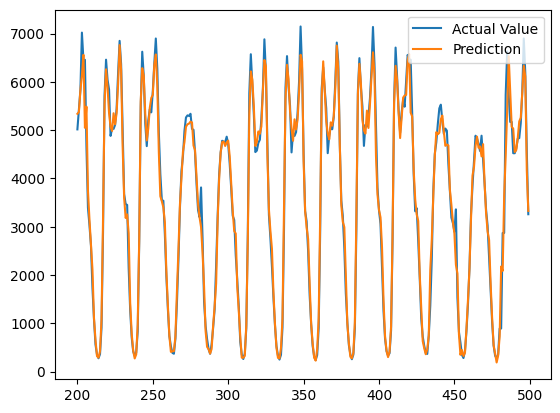

In [90]:
Y_pred = TT[:, 7]
Y_test = Y_TT[:, 7]

X =  [i for i in range(len(Y_TT))]
plt.plot(X[200:500], Y_test[200:500])
plt.plot(X[200:500], Y_pred[200:500])
plt.legend(['Actual Value','Prediction'])
plt.show()

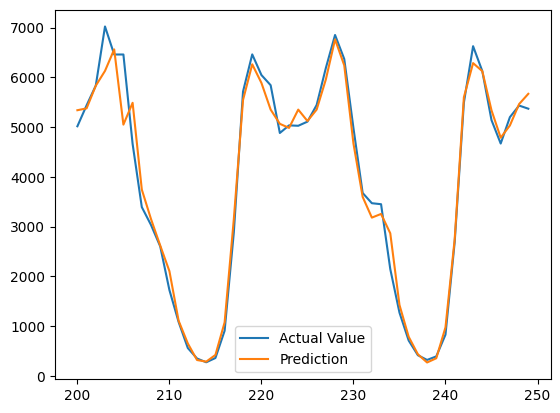

In [91]:
Y_pred = TT[:, 7]
Y_test = Y_TT[:, 7]

X =  [i for i in range(len(Y_TT))]
plt.plot(X[200:250], Y_test[200:250])
plt.plot(X[200:250], Y_pred[200:250])
plt.legend(['Actual Value','Prediction'])
plt.show()

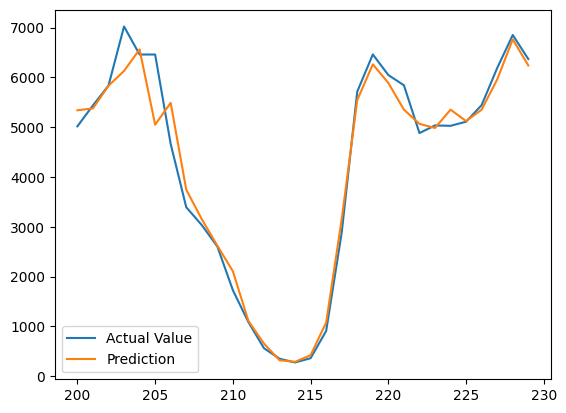

In [92]:
Y_pred = TT[:, 7]
Y_test = Y_TT[:, 7]

X =  [i for i in range(len(Y_TT))]
plt.plot(X[200:230], Y_test[200:230])
plt.plot(X[200:230], Y_pred[200:230])
plt.legend(['Actual Value','Prediction'])
plt.show()

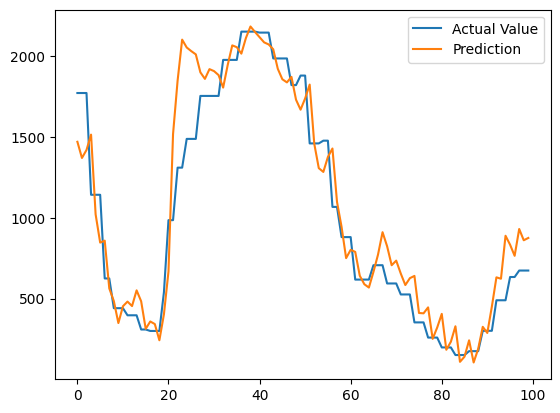

In [93]:
Y_pred = TT[:, 7]
Y_test = Y_TT[:, 7]

X =  [i for i in range(len(Y_TT))]
plt.plot(X[0:100], Y_test[0:100])
plt.plot(X[0:100], Y_pred[0:100])
plt.legend(['Actual Value','Prediction'])
plt.show()

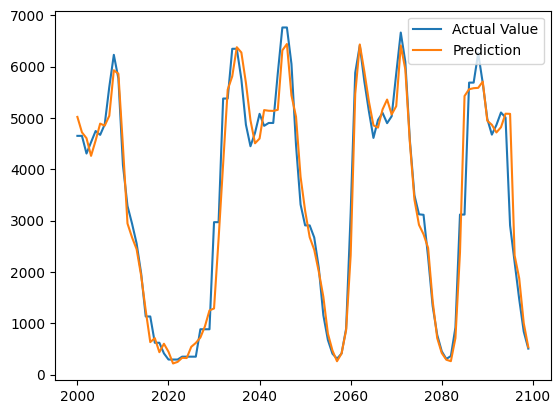